In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR

In [2]:
plt.rcParams['font.family']=['Heiti TC']
plt.rcParams['figure.figsize']=(20,10)

In [5]:
fn='tutorial/chapter6/demo/data/data.csv'
data=pd.read_csv(fn)

In [6]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,3831732,181.54,448.19,7571.00,6212.70,6370241,525.71,985.31,60.62,65.66,120.0,1.029,5321,64.87
1,3913824,214.63,549.97,9038.16,7601.73,6467115,618.25,1259.20,73.46,95.46,113.5,1.051,6529,99.75
2,3928907,239.56,686.44,9905.31,8092.82,6560508,638.94,1468.06,81.16,81.16,108.2,1.064,7008,88.11
3,4282130,261.58,802.59,10444.60,8767.98,6664862,656.58,1678.12,85.72,91.70,102.2,1.092,7694,106.07
4,4453911,283.14,904.57,11255.70,9422.33,6741400,758.83,1893.52,88.88,114.61,97.7,1.200,8027,137.32


In [7]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,2.000000e+01,20.000000,20.000000,20.00000,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,5.579520e+06,765.035000,2370.825000,19644.68500,15870.948000,7.350514e+06,1712.239000,5705.799000,129.493500,340.216500,103.305000,1.422200,17273.80000,618.084000
std,1.262195e+06,595.698321,1919.166802,10203.02167,8199.771393,6.213419e+05,1184.713839,4478.400207,50.509834,251.577939,5.513283,0.253235,11109.18894,609.254499
min,3.831732e+06,181.540000,448.190000,7571.00000,6212.700000,6.370241e+06,525.710000,985.310000,60.620000,65.660000,97.500000,1.029000,5321.00000,64.870000
25%,4.525117e+06,302.220000,976.660000,11827.81500,9669.162500,6.822868e+06,848.402500,2077.765000,91.857500,143.237500,99.800000,1.199500,8418.50000,175.435000
50%,5.308896e+06,565.940000,1586.020000,15943.37500,12345.705000,7.314304e+06,1262.050000,4104.585000,113.530000,235.760000,102.450000,1.456000,13267.00000,319.500000
75%,6.594658e+06,1033.535000,3294.485000,25889.93750,21332.185000,7.867810e+06,2244.117500,8500.087500,169.962500,521.065000,103.925000,1.578250,22633.00000,909.272500
max,7.599295e+06,2110.780000,6882.850000,42049.14000,33156.830000,8.323096e+06,4454.550000,15420.140000,228.460000,852.560000,120.000000,1.906000,41972.00000,2088.140000


In [8]:
desc = [data.min(),data.max(),data.mean(),data.std()]

In [10]:
desc = pd.DataFrame(desc, index=['Min','Max','Mean','STD']).T

In [14]:
print(np.round(desc,2))

            Min         Max        Mean         STD
x1   3831732.00  7599295.00  5579519.95  1262194.72
x2       181.54     2110.78      765.04      595.70
x3       448.19     6882.85     2370.83     1919.17
x4      7571.00    42049.14    19644.69    10203.02
x5      6212.70    33156.83    15870.95     8199.77
x6   6370241.00  8323096.00  7350513.60   621341.85
x7       525.71     4454.55     1712.24     1184.71
x8       985.31    15420.14     5705.80     4478.40
x9        60.62      228.46      129.49       50.51
x10       65.66      852.56      340.22      251.58
x11       97.50      120.00      103.30        5.51
x12        1.03        1.91        1.42        0.25
x13     5321.00    41972.00    17273.80    11109.19
y         64.87     2088.14      618.08      609.25


In [24]:
corr = data.corr(method='pearson')
print(np.round(corr,2))

       x1    x2    x3    x4    x5    x6    x7    x8    x9   x10   x11   x12  \
x1   1.00  0.95  0.95  0.97  0.97  0.99  0.95  0.97  0.98  0.98 -0.29  0.94   
x2   0.95  1.00  1.00  0.99  0.99  0.92  0.99  0.99  0.98  0.98 -0.13  0.89   
x3   0.95  1.00  1.00  0.99  0.99  0.92  1.00  0.99  0.98  0.99 -0.15  0.89   
x4   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.19  0.91   
x5   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.18  0.90   
x6   0.99  0.92  0.92  0.95  0.95  1.00  0.93  0.95  0.97  0.96 -0.34  0.95   
x7   0.95  0.99  1.00  0.99  0.99  0.93  1.00  0.99  0.98  0.99 -0.15  0.89   
x8   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.15  0.90   
x9   0.98  0.98  0.98  0.99  0.99  0.97  0.98  0.99  1.00  0.99 -0.23  0.91   
x10  0.98  0.98  0.99  1.00  1.00  0.96  0.99  1.00  0.99  1.00 -0.17  0.90   
x11 -0.29 -0.13 -0.15 -0.19 -0.18 -0.34 -0.15 -0.15 -0.23 -0.17  1.00 -0.43   
x12  0.94  0.89  0.89  0.91  0.90  0.95  0.89  0.90 

In [32]:
corr.sort_values(by='y',ascending=False)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
y,0.938657,0.984676,0.992741,0.987478,0.988964,0.909062,0.994115,0.988947,0.975441,0.986830,-0.120977,0.868982,0.988245,1.000000
x7,0.953170,0.990983,0.996440,0.993923,0.992129,0.927263,1.000000,0.994891,0.982857,0.991463,-0.151829,0.887458,0.995589,0.994115
x3,0.946105,0.997153,1.000000,0.994579,0.992625,0.918570,0.996440,0.994398,0.981389,0.987977,-0.146433,0.887417,0.997129,0.992741
x5,0.971181,0.989825,0.992625,0.998645,1.000000,0.947662,0.992129,0.996991,0.994131,0.996364,-0.180938,0.896969,0.994758,0.988964
x8,0.970053,0.993305,0.994398,0.997624,0.996991,0.948254,0.994891,1.000000,0.993077,0.996786,-0.154884,0.897361,0.998159,0.988947
x13,0.961951,0.997097,0.997129,0.996877,0.994758,0.938881,0.995589,0.998159,0.988529,0.992369,-0.155952,0.897713,1.000000,0.988245
x4,0.970858,0.992443,0.994579,1.000000,0.998645,0.949673,0.993923,0.997624,0.992740,0.995424,-0.189866,0.907801,0.996877,0.987478
x10,0.978001,0.983910,0.987977,0.995424,0.996364,0.957005,0.991463,0.996786,0.993905,1.000000,-0.168262,0.903448,0.992369,0.986830
x2,0.946127,1.000000,0.997153,0.992443,0.989825,0.919806,0.990983,0.993305,0.979635,0.983910,-0.133694,0.887553,0.997097,0.984676
x9,0.983138,0.979635,0.981389,0.992740,0.994131,0.967872,0.982857,0.993077,1.000000,0.993905,-0.225543,0.907972,0.988529,0.975441


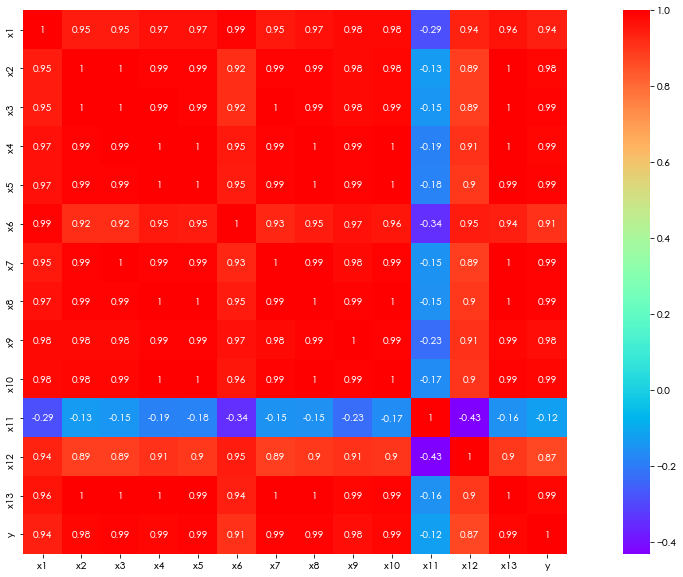

In [35]:
sns.heatmap(corr,annot=True,vmax=1,square=True,cmap='rainbow')
plt.show()

In [38]:
lasso = Lasso(1000)

In [39]:
lasso.fit(data.iloc[:,0:13],data['y'])

/Users/xiebian/anaconda3/envs/web/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34165.31873662031, tolerance: 705.262984228
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1000)

In [41]:
print(np.round(lasso.coef_,5))

[-1.8000e-04 -0.0000e+00  1.2414e-01 -1.0310e-02  6.5400e-02  1.2000e-04
  3.1741e-01  3.4900e-02 -0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 -4.0300e-02]


In [42]:
np.sum(lasso.coef_!=0)

8

In [43]:
mask=lasso.coef_!=0

In [73]:
print(data.columns[:-1][mask])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 13

In [69]:
fn = 'tutorial/chapter6/demo/tmp/new_reg_data_GM11.xls'
data=pd.read_excel(fn,index_col=0)

In [70]:
data.head()

,Unnamed: 0.1,x1,x3,x4,x5,x6,x7,x8,x13,y
1994,0.0,3831732.0,448.19,7571.00,6212.70,6370241.0,525.71,985.31,5321.0,64.87
1995,1.0,3913824.0,549.97,9038.16,7601.73,6467115.0,618.25,1259.20,6529.0,99.75
1996,2.0,3928907.0,686.44,9905.31,8092.82,6560508.0,638.94,1468.06,7008.0,88.11
1997,3.0,4282130.0,802.59,10444.60,8767.98,6664862.0,656.58,1678.12,7694.0,106.07
1998,4.0,4453911.0,904.57,11255.70,9422.33,6741400.0,758.83,1893.52,8027.0,137.32


In [71]:
data.iloc[:,1]

1994    3831732.00
1995    3913824.00
1996    3928907.00
1997    4282130.00
1998    4453911.00
1999    4548852.00
2000    4962579.00
2001    5029338.00
2002    5070216.00
2003    5210706.00
2004    5407087.00
2005    5744550.00
2006    5994973.00
2007    6236312.00
2008    6529045.00
2009    6791495.00
2010    7110695.00
2011    7431755.00
2012    7512997.00
2013    7599295.00
2014    8142148.24
2015    8460489.28
Name: x1, dtype: float64

In [72]:
data.loc[range(1994,2014)]

,Unnamed: 0.1,x1,x3,x4,x5,x6,x7,x8,x13,y
1994,0.0,3831732.0,448.19,7571.00,6212.70,6370241.0,525.71,985.31,5321.0,64.87
1995,1.0,3913824.0,549.97,9038.16,7601.73,6467115.0,618.25,1259.20,6529.0,99.75
1996,2.0,3928907.0,686.44,9905.31,8092.82,6560508.0,638.94,1468.06,7008.0,88.11
1997,3.0,4282130.0,802.59,10444.60,8767.98,6664862.0,656.58,1678.12,7694.0,106.07
1998,4.0,4453911.0,904.57,11255.70,9422.33,6741400.0,758.83,1893.52,8027.0,137.32
1999,5.0,4548852.0,1000.69,12018.52,9751.44,6850024.0,878.26,2139.18,8549.0,188.14
2000,6.0,4962579.0,1121.13,13966.53,11349.47,7006896.0,923.67,2492.74,9566.0,219.91
2001,7.0,5029338.0,1248.29,14694.00,11467.35,7125979.0,978.21,2841.65,10473.0,271.91
2002,8.0,5070216.0,1370.68,13380.47,10671.78,7206229.0,1009.24,3203.96,11469.0,269.10
2003,9.0,5210706.0,1494.27,15002.59,11570.58,7251888.0,1175.17,3758.62,12360.0,300.55


In [76]:
features = ['x1','x3','x4','x5','x6','x7','x8','x13']

In [79]:
data_train = data.loc[range(1994,2014)]

In [80]:
data_mean_sz = (data_train - data_train.mean()) / data_train.std()

In [82]:
x_train = data_mean_sz[features]
y_train = data_mean_sz['y']

In [84]:
lsvr = LinearSVR()
lsvr.fit(x_train,y_train)

/Users/xiebian/anaconda3/envs/web/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR()

In [85]:
x = (data[features]-data[features].mean()) / data[features].std()

In [86]:
data['pred_y']=lsvr.predict(x)*data['y'].std() + data['y'].mean()

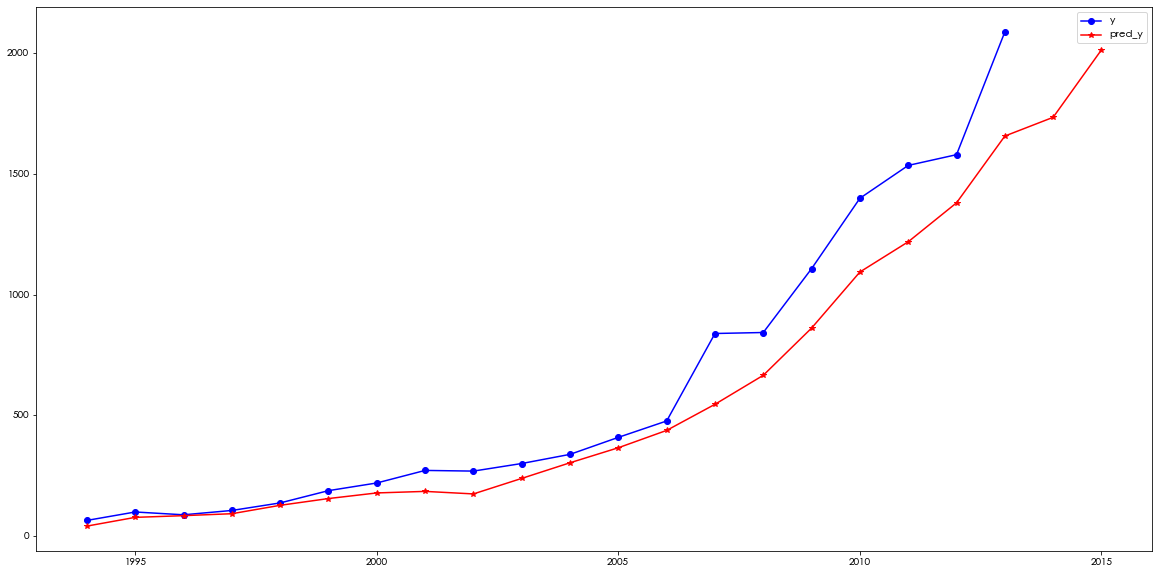

In [90]:
data[['y','pred_y']].plot(style=['b-o','r-*'])
plt.show()